In [24]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Esercitazione 7 _ Bonato Angela

L'esercitazione richiedeva di considerare un sistema composto da $N_p=108$ particelle e studiarne alcune caratteristiche in tre diversi stati di aggregazione: solido (densità $\rho^* = 1.1$, temperatura $T^* = 0.8$, raggio di cutoff $r_c = 2.2$), liquido ($\rho^*=0.8$, $T^*=1.1$ e $r_c=2.5$) e gassoso($\rho^*=0.05$, $T^*=1.2$ e $r_c=5.0$), dove l'apice $^*$ indica sempre l'uso delle unità naturali già illustrate.

Innanzitutto, ho completato il codice di simulazione fornito aggiungendo le correzioni di coda sulle misure di pressione ed energia potenziale, oltre al calcolo della funzione di distribuzione radiale $g(r)$. Anche in questo caso ho inserito qualche piccola modifica per gestire più agevolmente il programma nel main e dal terminale.

Per ogni stato considerato, la prima analisi effettuata ha riguardato il data blocking e la funzione di autocorrelazione. Dopo aver equilibrato il sistema, ho effettuato $M=5\cdot10^5$ passi con algoritmo di Metropolis (avendo fissato durante l'equilibrazione una probabilità di transizione tc l'accettazione fosse circa pari al $50\%$) e ho misurato per ognuno di essi l'energia potenziale per particella $E_\mathrm{pot}^*/N_p$. Usando i dati così ottenuti, ho calcolato la loro autocorrelazione in funzione del numero di passi effettuato dall'algoritmo ($Ac(t)$) e il valore dell'errore a blocchi $\sigma_B(L)$ calcolato considerando blocchi formati da $L\in[10,5\cdot10^3]$ passi.

In seguito, effettuata un'adeguata equilibrazione, ho simulato il sistema per $N=50$ blocchi da $L=2000$ passi ciascuno per il campionamento di dinamica molecolare basato sull'algoritmo di Verlet e fissati in base all'anailisi precedente per il campionamento Monte Carlo. Con il Metropolis ho effettuato un'analisi a blocchi sul valor medio di $E_\mathrm{pot}^*/N_p$ e della pressione $P^*$ del sistema. Poi, per entrambi gli algoritmi, ho misurato $g(r^*)$ in modo da ottenerne l'andamento.

In [25]:
#implementazione del calcolo della funzione di autocorrelazione dato un array di misure mis e un tempo t
def AutoCorr(mis, t):
    t_max=len(mis)
    #sommatorie della formula nell'ordine in cui compaiono, con già la normalizzazione
    sum1=np.mean(mis[:t_max-t]*mis[t:t_max])
    sum2=np.mean(mis[:(t_max-t)])
    sum3=np.mean(mis[t:t_max])
    sum4=np.mean(mis*mis)
    sum5=np.mean(mis)
    return (sum1-(sum2*sum3))/(sum4-(sum5**2))

#errore a blocchi larghi L passi su un array di dati mis, ritorna media e errore all'ultimo blocco
def BlockAnalysis(mis, L):
    if L==0:
        raise ValueError("Errore: la larghezza dei blocchi non può essere zero.")
    B=len(mis)//L  #numero di blocchi
    if len(mis)%B != 0:
        raise ValueError("Attenzione: il numero di blocchi inserito non è divisore del numero di lanci totale.")
    mis_blocks=np.reshape(mis[:B*L], (B, L))  #creo B vettori da L elementi
    #medie per ogni blocco
    mean_block=np.mean(mis_blocks, axis=1)
    mean_block2=mean_block*mean_block
    #medie considerando tutti i blocchi
    mean_tot=np.sum(mean_block)/B
    mean_tot2=np.sum(mean_block2)/B
    #errore all'ultimo blocco
    fin_error=np.sqrt((mean_tot2 - mean_tot**2)/B)
    return fin_error   

In [26]:
#variabili utilizzate

Nan=500000  #passi della simulazione di analisi
xan=np.arange(Nan)  #plotto in base agli steps, non faccio media a blocchi

#divisori di 500000 che uso come larghezza dei blocchi per calcolare sigma_B(L)
Ls=np.array([x for x in range(10,5001) if (Nan%x ==0)]) 
ts=xan[:800]  #valori di t per cui valuto autocorrelazione

Nbl=50  #numero blocchi analisi gofr
xbl=np.arange(Nbl)+1

## Stato solido 

### Data blocking e autocorrelazione 

I plot relativi alla valutazione della correlazione e dell'errore a blocchi danno risultati coerenti: in corrispondenza del numero di passi per cui $Ac(t)$ inizia a stabilizzarsi attorno allo zero, $\sigma_B(L)$ comincia ad assumere valori circa costanti smettendo di crescere. Per $L$ grandi l'errore $\sigma_B$ viene calcolato su pochi blocchi, dunque il suo andamento inizia a deviare dal plateau prima osservato.

Per dare meglio conto di questi comportamenti, i grafici riportano solo la porzione di dati considerata più significativa.

In [27]:
#vettore di misure istantanee di energia stato solido
sol_inst=np.loadtxt("SolidState/inst_penergy.dat", delimiter=" ", usecols=0,  unpack="true")  

In [28]:
#calcolo dell'autocorrelazione
sol_ac=np.empty(len(ts))
for i in range(len(ts)):
    sol_ac[i]=AutoCorr(sol_inst, ts[i])

In [29]:
#calcolo dell'errore a blocchi
sol_error=np.zeros(len(Ls))
for i in range(len(Ls)):
    sol_error[i]=BlockAnalysis(sol_inst, Ls[i])

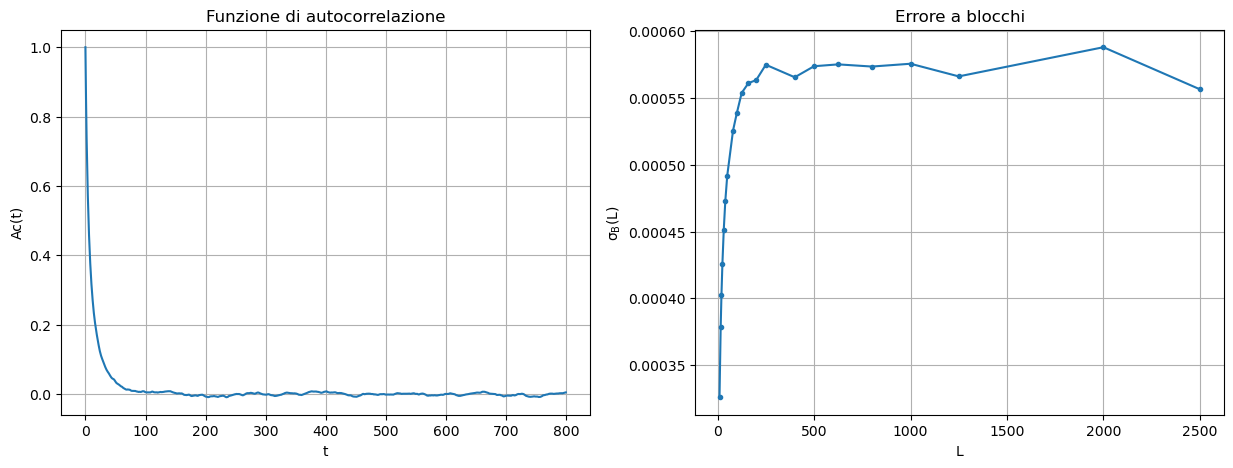

In [31]:
sbfig ,(sbplt1, sbplt2) = plt.subplots(1, 2, figsize=(15, 5))

sbplt1.plot(ts, sol_ac)
sbplt1.set_xlabel("t")
sbplt1.set_ylabel("Ac(t)")
sbplt1.set_title("Funzione di autocorrelazione")
sbplt1.grid(True)

sbplt2.plot(Ls[:21], sol_error[:21], marker='.')
sbplt2.set_xlabel("L")
sbplt2.set_ylabel(r"$\mathrm{\sigma_B(L)}$")
sbplt2.set_title("Errore a blocchi")
sbplt2.grid(True)

plt.show()

### Funzione di distribuzione radiale

Sono riportati i plot delle misure a blocchi effettuate e dell'andamento trovato per $g(r^*)$. Guardando all'andamento di autocorrelazione ed errore a blocchi, con l'algoritmo di Metropolis ho effettuato $N=50$ blocchi da $L=500$ passi; in modo da essere nella fase prossima a zero di $Ac(t)$ e sul plateau stabile di $\sigma_B(L).$

Per mostrare meglio la differenza fra i risultati ottenuti in quest'ultimo caso usando prima Metropolis ($V_{MC}$) e poi Verlet ($V_{DM}$), ho plottato anche un grafico che mostra la differenza fra i due dataset corredata di errori sommati in quadratura (secondo le formule di propagazione dell'errore). Il confronto fatto è da leggersi solo in maniera qualitativa e non come una comparazione quantitativa con un valore atteso e un range di compatibilità. I punti, infatti, sembrano in gran parte incompatibili con zero. Ciò potrebbe suggerire incompatibilità fra i due metodi usati, ma in realtà, probabilmente, è una semplice conseguenza della buona statistica raggiunta nell'analisi che ha permesso di ottenere errori molto bassi.

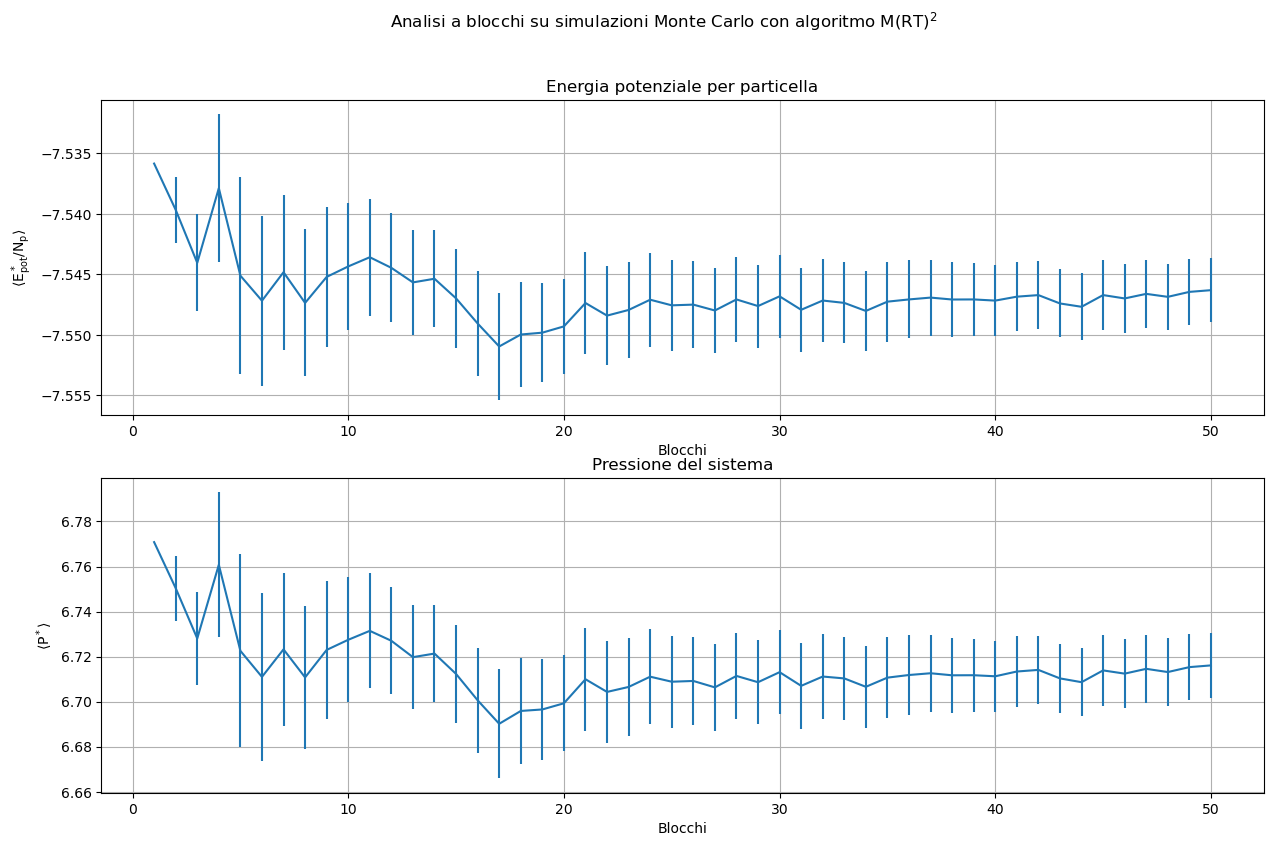

In [34]:
#simulazione Monte Carlo (passi con Metropolis) di energia potenziale e pressione con errori
sol_en, sol_en_err=np.loadtxt("SolidState/potential_energy.dat", usecols=(2, 3), unpack="true")  
sol_pres, sol_pres_err=np.loadtxt("SolidState/pressure.dat", usecols=(2, 3), unpack="true")

smfig ,(smplt1, smplt2) = plt.subplots(2, 1, figsize=(15, 9))

smplt1.errorbar(xbl, sol_en, yerr=sol_en_err)
smplt1.set_xlabel("Blocchi")
smplt1.set_ylabel(r"$\langle \mathrm{E_{pot}^*/N_p} \rangle$")
smplt1.set_title("Energia potenziale per particella")
smplt1.grid(True)

smplt2.errorbar(xbl, sol_pres, yerr=sol_pres_err)
smplt2.set_xlabel("Blocchi")
smplt2.set_ylabel(r"$\langle \mathrm{P^*} \rangle$")
smplt2.set_title("Pressione del sistema")
smplt2.grid(True)

smfig.suptitle(r"Analisi a blocchi su simulazioni Monte Carlo con algoritmo $\mathrm{M(RT)^2}$")
plt.show()

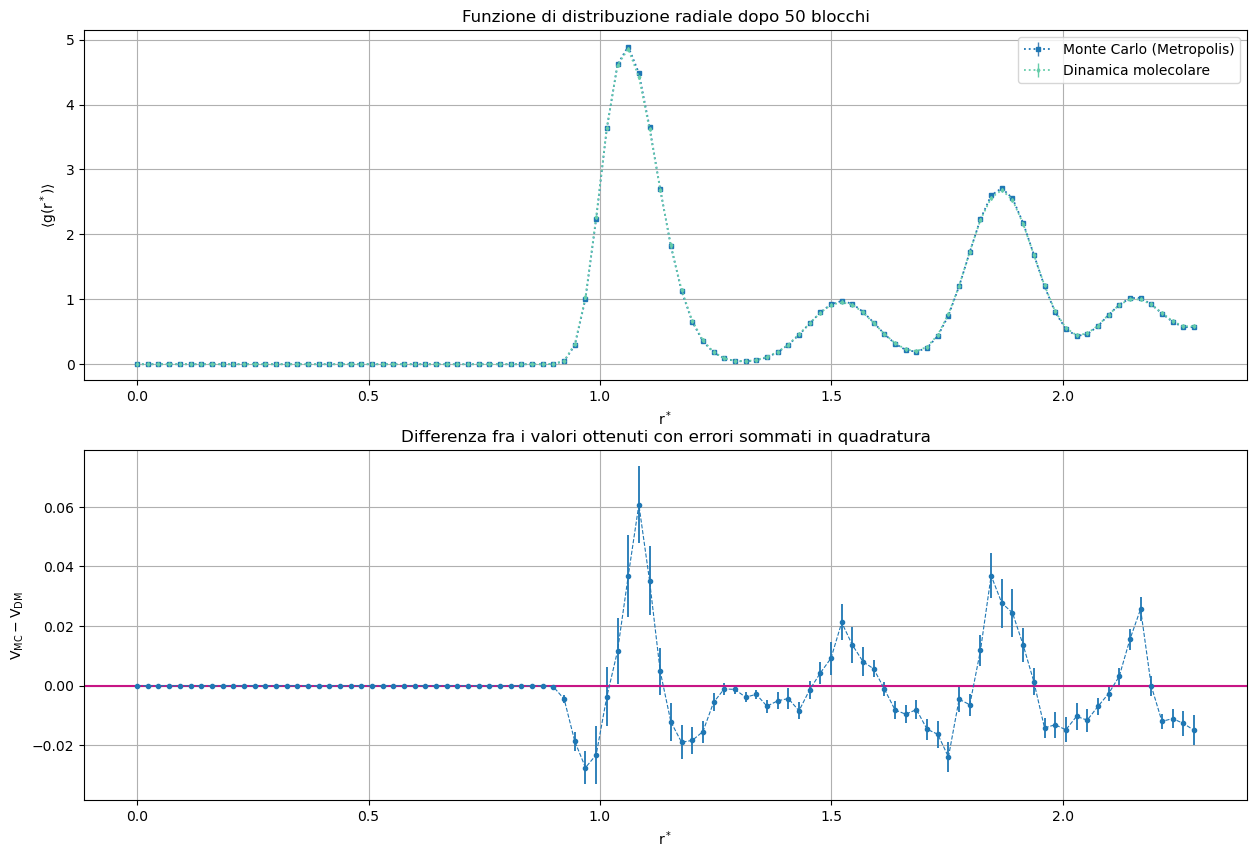

In [35]:
#simulazione della gofr con moltecarlo e con dinamica molecolare
#x, y e yerr plot gofr Monte Carlo
sol_xgofr1, sol_gofr1, sol_err1=np.loadtxt("SolidState/fin_gofr1.dat", usecols=(0, 1, 2), unpack="true")
#x, y e yerr plot gofr Dinamica Molecolare
sol_xgofr0, sol_gofr0, sol_err0=np.loadtxt("SolidState/fin_gofr0.dat", usecols=(0, 1, 2), unpack="true")

sgfig ,(sgplt1, sgplt2) = plt.subplots(2, 1, figsize=(15, 10))

sgplt1.errorbar(sol_xgofr1, sol_gofr1, yerr=sol_err1, marker='s', linestyle=':', elinewidth=1, ecolor="steelblue", markersize=2.5, linewidth=1.3, label="Monte Carlo (Metropolis)")
sgplt1.errorbar(sol_xgofr0, sol_gofr0, yerr=sol_err0, marker='d', linestyle=':', elinewidth=1, markersize=2, linewidth=1.3, label="Dinamica molecolare", color="mediumaquamarine")
sgplt1.set_xlabel(r"$\mathrm{r^*}$")
sgplt1.set_ylabel(r"$\langle \mathrm{g(r^*)} \rangle$")
sgplt1.set_title("Funzione di distribuzione radiale dopo 50 blocchi")
sgplt1.legend()
sgplt1.grid(True)

sgplt2.errorbar(sol_xgofr1, sol_gofr1-sol_gofr0, yerr=np.sqrt(sol_err1**2 + sol_err0**2), linestyle='--', marker='.', elinewidth=1.3, linewidth=0.8)
sgplt2.axhline(y=0, color="mediumvioletred")
sgplt2.set_xlabel(r"$\mathrm{r^*}$")
sgplt2.set_ylabel(r"$\mathrm{V_{MC}-V_{DM}}$")
sgplt2.set_title("Differenza fra i valori ottenuti con errori sommati in quadratura")
sgplt2.grid(True)

plt.show()

## Stato liquido

### Data blocking e autocorrelazione 

Le figure sottostanti sono analoghe a quelle descritte per lo stato solido. La funzione di autocorrelazione decresce più lentamente rispetto al caso precedente e l'andamento di $\sigma_B(L)$ rispecchia questo comportamento secondo i parametri già spiegati. Anche in questo caso i dataset plottati sono stati troncati per rendere più visibili le caratteristiche di maggior interesse.

In [10]:
#vettore di misure istantanee di energia stato liquido
liq_inst=np.loadtxt("LiquidState/inst_penergy.dat", delimiter=" ", usecols=0,  unpack="true")

In [11]:
#calcolo autocorrelazione
liq_ac=np.empty(len(ts))
for i in range(len(ts)):
    liq_ac[i]=AutoCorr(liq_inst, ts[i])

In [12]:
#calcolo errore a blocchi
liq_error=np.zeros(len(Ls))
for i in range(len(Ls)):
    liq_error[i]=BlockAnalysis(liq_inst, Ls[i])

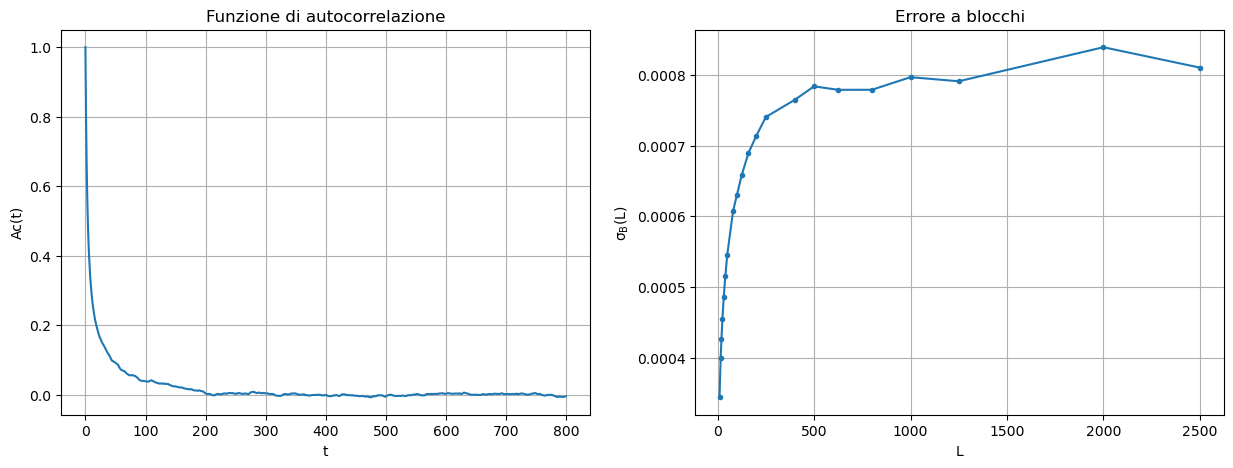

In [33]:
lbfig ,(lbplt1, lbplt2) = plt.subplots(1, 2, figsize=(15, 5))

lbplt1.plot(ts, liq_ac)
lbplt1.set_xlabel("t")
lbplt1.set_ylabel("Ac(t)")
lbplt1.set_title("Funzione di autocorrelazione")
lbplt1.grid(True)

lbplt2.plot(Ls[:21], liq_error[:21], marker='.')
lbplt2.set_xlabel("L")
lbplt2.set_ylabel(r"$\mathrm{\sigma_B(L)}$")
lbplt2.set_title("Errore a blocchi")
lbplt2.grid(True)

plt.show()

### Funzione di distribuzione radiale

Vengono riportati i grafici della seconda parte di analisi, analighi a quelli esposti per la fase solida. Qui, guardando agli andamenti di autocorrelazione e errore a blocchi, per il campionamento Metropolis ho scelto blocchi da $L=800$ passi. 

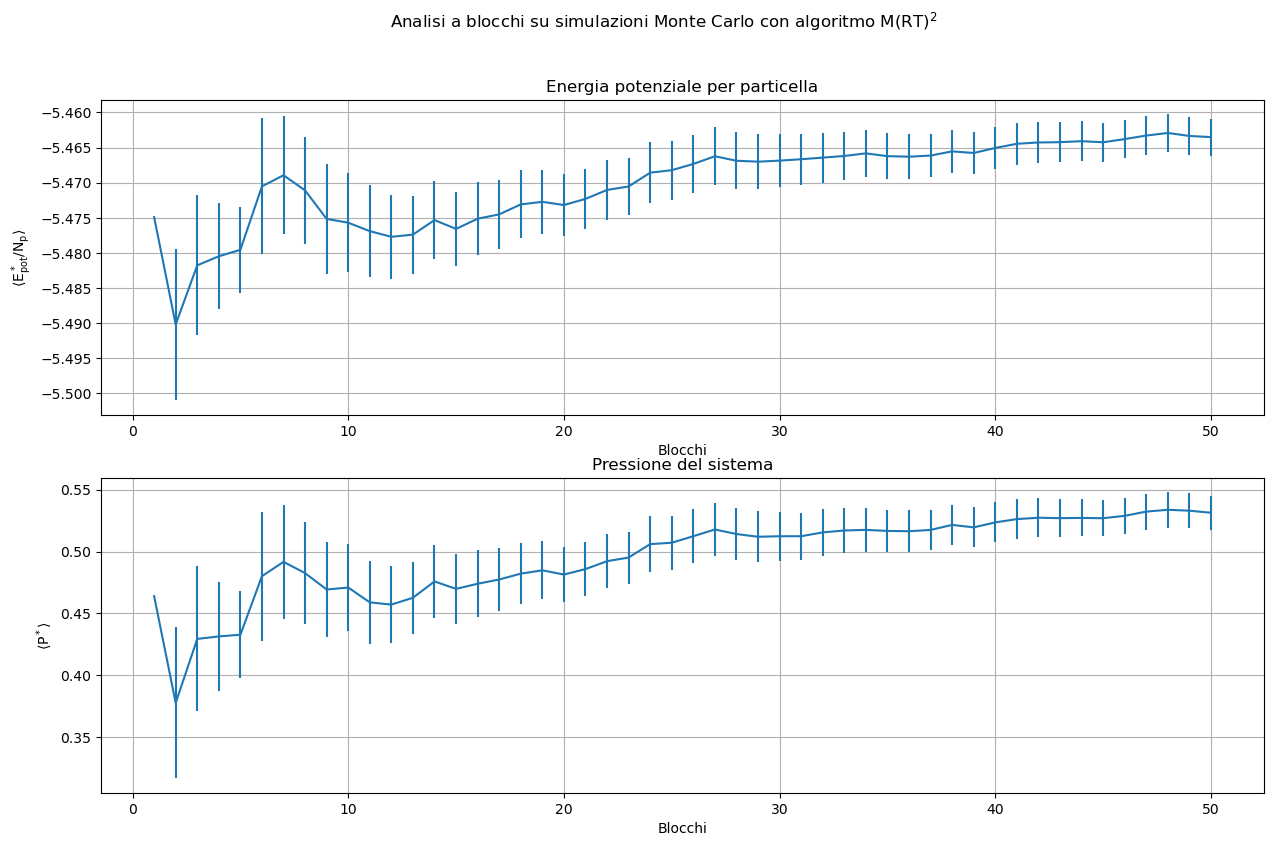

In [39]:
#simulazione Monte Carlo (passi con Metropolis) di energia potenziale e pressione
liq_en, liq_en_err=np.loadtxt("LiquidState/potential_energy.dat", usecols=(2, 3), unpack="true") 
liq_pres, liq_pres_err=np.loadtxt("LiquidState/pressure.dat", usecols=(2, 3), unpack="true")

lmfig ,(lmplt1, lmplt2) = plt.subplots(2, 1, figsize=(15, 9))

lmplt1.errorbar(xbl, liq_en, yerr=liq_en_err)
lmplt1.set_xlabel("Blocchi")
lmplt1.set_ylabel(r"$\langle \mathrm{E_{pot}^*/N_p} \rangle$")
lmplt1.set_title("Energia potenziale per particella")
lmplt1.grid(True)

lmplt2.errorbar(xbl, liq_pres, yerr=liq_pres_err)
lmplt2.set_xlabel("Blocchi")
lmplt2.set_ylabel(r"$\langle \mathrm{P^*} \rangle$")
lmplt2.set_title("Pressione del sistema")
lmplt2.grid(True)

lmfig.suptitle(r"Analisi a blocchi su simulazioni Monte Carlo con algoritmo $\mathrm{M(RT)^2}$")
plt.show()

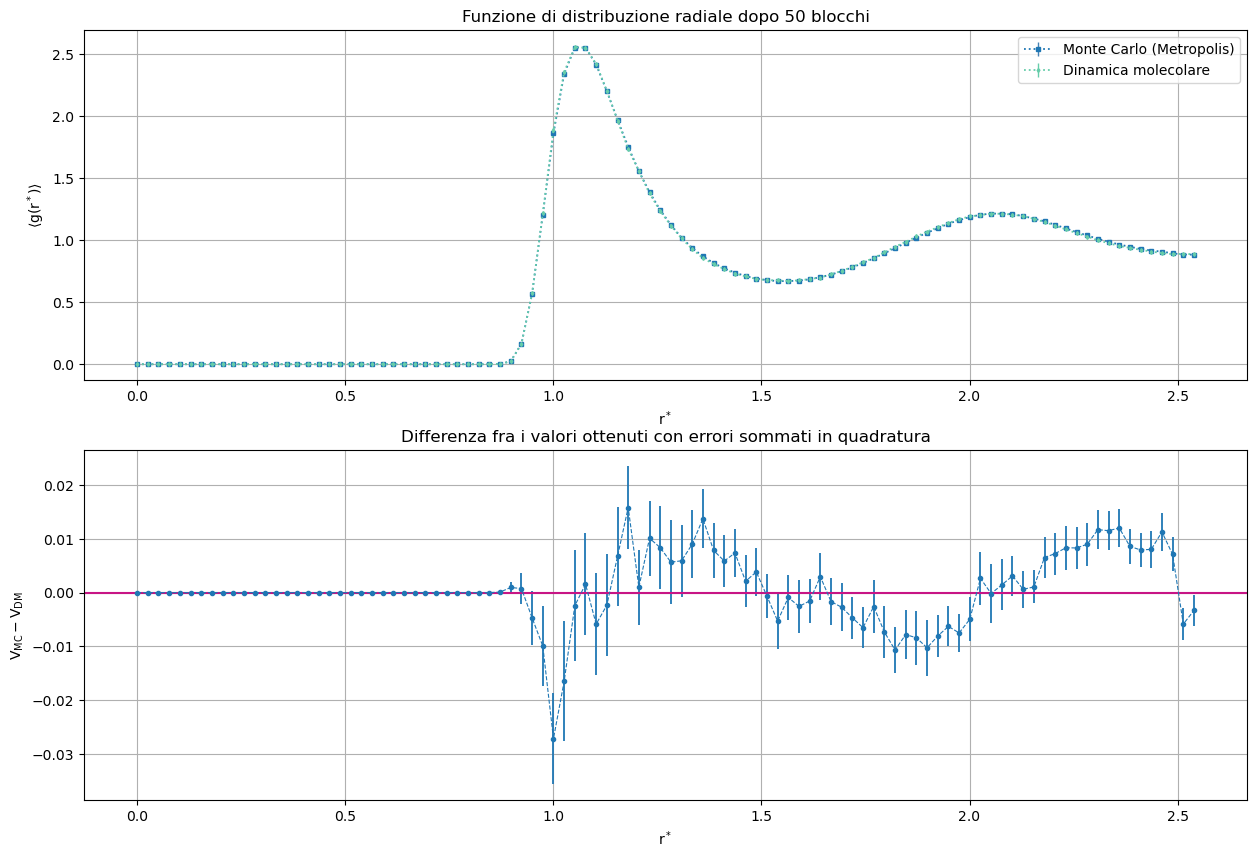

In [40]:
#simulazione della gofr con Monte Carlo e con dinamica molecolare
#x, y e yerr plot gofr Metropolis
liq_xgofr1, liq_gofr1, liq_err1=np.loadtxt("LiquidState/fin_gofr1.dat", usecols=(0, 1, 2), unpack="true") 
#x, y e yerr plot gofr Dinamica Molecolare
liq_xgofr0, liq_gofr0, liq_err0=np.loadtxt("LiquidState/fin_gofr0.dat", usecols=(0, 1, 2), unpack="true")

lgfig ,(lgplt1, lgplt2) = plt.subplots(2, 1, figsize=(15, 10))

lgplt1.errorbar(liq_xgofr1, liq_gofr1, yerr=liq_err1, marker='s', linestyle=':', elinewidth=1, ecolor="steelblue", markersize=2.5, linewidth=1.3, label="Monte Carlo (Metropolis)")
lgplt1.errorbar(liq_xgofr0, liq_gofr0, yerr=liq_err0, marker='d', linestyle=':', elinewidth=1, markersize=2, linewidth=1.3, label="Dinamica molecolare", color="mediumaquamarine")
lgplt1.set_xlabel(r"$\mathrm{r^*}$")
lgplt1.set_ylabel(r"$\langle \mathrm{g(r^*)} \rangle$")
lgplt1.set_title("Funzione di distribuzione radiale dopo 50 blocchi")
lgplt1.legend()
lgplt1.grid(True)

lgplt2.errorbar(liq_xgofr1, liq_gofr1-liq_gofr0, yerr=np.sqrt(liq_err1**2 + liq_err0**2), linestyle='--', marker='.', elinewidth=1.3, linewidth=0.8)
lgplt2.axhline(y=0, color="mediumvioletred")
lgplt2.set_xlabel(r"$\mathrm{r^*}$")
lgplt2.set_ylabel(r"$\mathrm{V_{MC}-V_{DM}}$")
lgplt2.set_title("Differenza fra i valori ottenuti con errori sommati in quadratura")
lgplt2.grid(True)

plt.show()

## Stato gassoso

Lo stato gassoso risulta essere più diluito rispetto a quelli analizzati in precedenza. Per questo, usando l'algoritmo di Metropolis, è necessario allargare di molto il passo $\delta$ della funzione di transizione per evitare un tasso di accettazione troppo alto. Tuttavia, aumentando eccessivamente $\delta$, si eccede la dimensione del box su cui sono applicate le condizioni al contorno e dunque la funzione ad ogni passo torna sempre nello stesso punto. Risulta quindi inutile, ai fini dell'accettazione, continuare ad agire su $\delta$. Per questo motivo in questa analisi non sono riuscita ad ottenere un tasso di accettazione più basso di $60\%$.

### Data blocking e autocorrelazione

Per lo stato in esame si nota una decrescita molto veloce dell'autocorrelazione, che corrisponde ad una veloce crescita dell'errore a blocchi nonchè ad un'anticipazione della fine del suo tratto stabile. 

In [16]:
#valori istantanei di energia potenziale per lo stato gassoso
gas_inst=np.loadtxt("GasState/inst_penergy.dat", delimiter=" ", usecols=0,  unpack="true") 

In [17]:
#calcolo autocorrelazione
gas_ac=np.empty(len(ts))
for i in range(len(ts)):
    gas_ac[i]=AutoCorr(gas_inst, ts[i])

In [18]:
#calcolo errore a blocchi
gas_error=np.zeros(len(Ls))
for i in range(len(Ls)):
    gas_error[i]=BlockAnalysis(gas_inst, Ls[i])

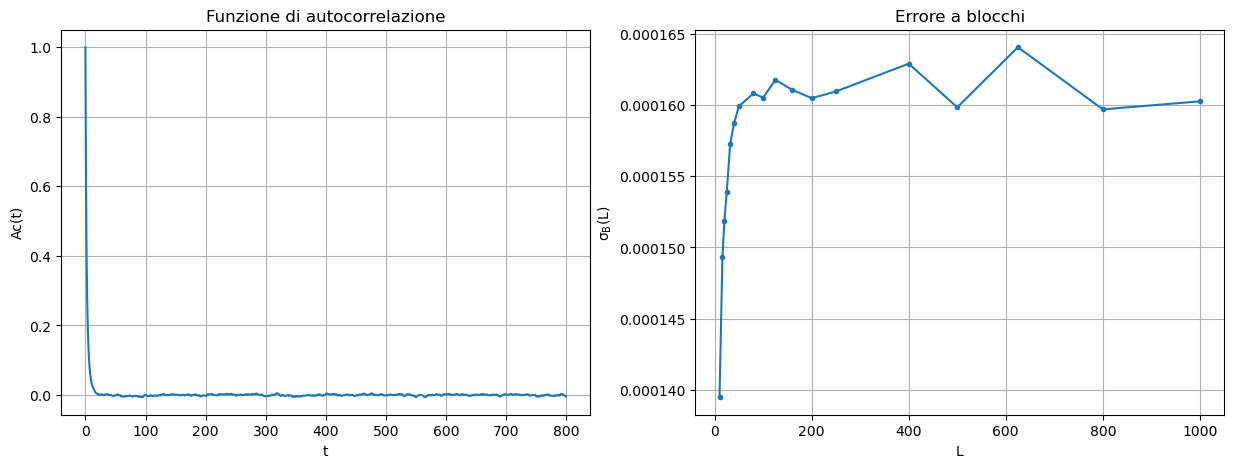

In [38]:
gbfig ,(gbplt1, gbplt2) = plt.subplots(1, 2, figsize=(15, 5))

gbplt1.plot(ts, gas_ac)
gbplt1.set_xlabel("t")
gbplt1.set_ylabel("Ac(t)")
gbplt1.set_title("Funzione di autocorrelazione")
gbplt1.grid(True)

gbplt2.plot(Ls[:18], gas_error[:18], marker='.')
gbplt2.set_xlabel("L")
gbplt2.set_ylabel(r"$\mathrm{\sigma_B(L)}$")
gbplt2.set_title("Errore a blocchi")
gbplt2.grid(True)

plt.show()

### Funzione di distribuzione radiale

Visti i risultati appena commentati, per l'analisi a blocchi con campionamento Metropolis in questa fase ho scelto $L=200$.

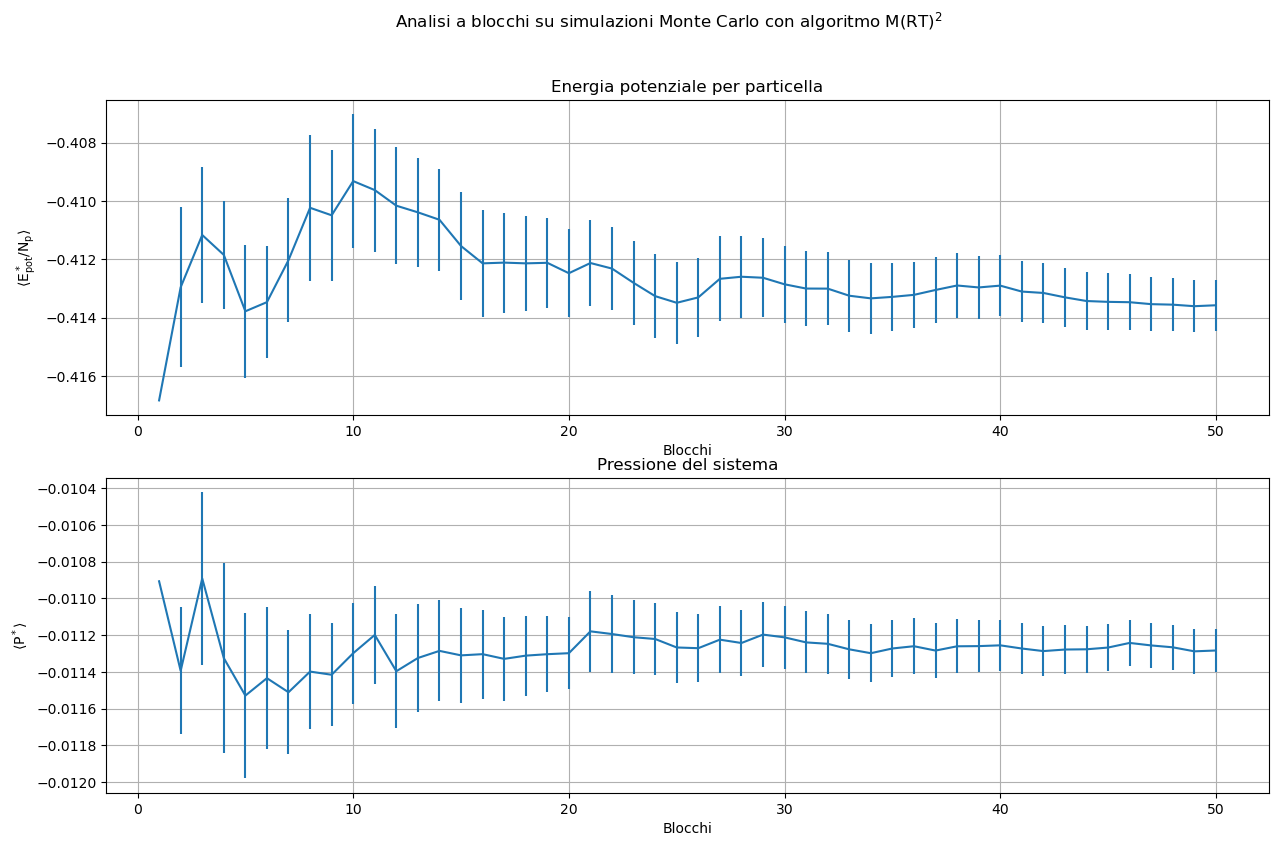

In [41]:
#simulazione Monte Carlo (passi con Metropolis) di energia potenziale e pressione
gas_en, gas_en_err=np.loadtxt("GasState/potential_energy.dat", usecols=(2, 3), unpack="true")
gas_pres, gas_pres_err=np.loadtxt("GasState/pressure.dat", usecols=(2, 3), unpack="true")

gmfig ,(gmplt1, gmplt2) = plt.subplots(2, 1, figsize=(15, 9))

gmplt1.errorbar(xbl, gas_en, yerr=gas_en_err)
gmplt1.set_xlabel("Blocchi")
gmplt1.set_ylabel(r"$\langle \mathrm{E_{pot}^*/N_p} \rangle$")
gmplt1.set_title("Energia potenziale per particella")
gmplt1.grid(True)

gmplt2.errorbar(xbl, gas_pres, yerr=gas_pres_err)
gmplt2.set_xlabel("Blocchi")
gmplt2.set_ylabel(r"$\langle \mathrm{P^*} \rangle$")
gmplt2.set_title("Pressione del sistema")
gmplt2.grid(True)

gmfig.suptitle(r"Analisi a blocchi su simulazioni Monte Carlo con algoritmo $\mathrm{M(RT)^2}$")
plt.show()

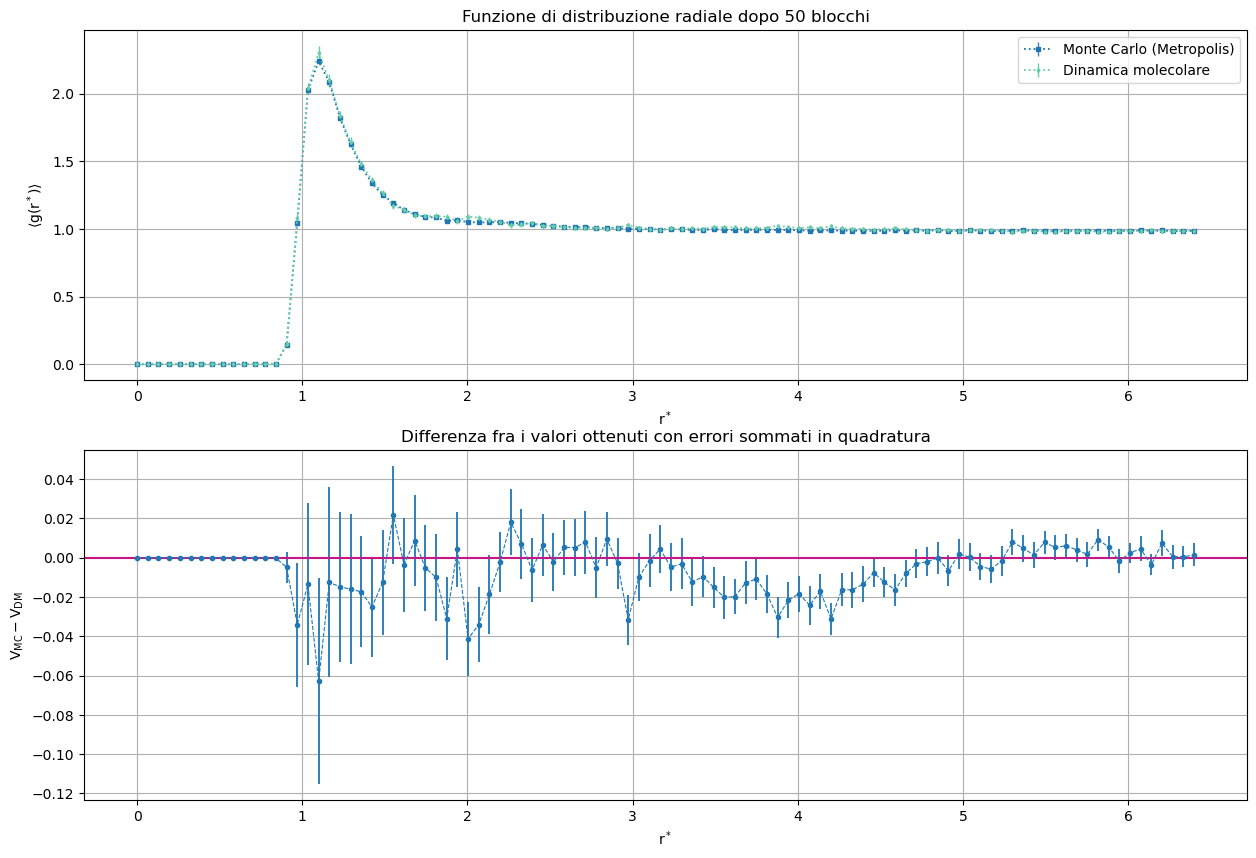

In [42]:
#simulazione della gofr con Monte Carlo e con dinamica molecolare
#x, y e yerr plot gofr Metropolis
gas_xgofr1, gas_gofr1, gas_err1=np.loadtxt("GasState/fin_gofr1.dat", usecols=(0, 1, 2), unpack="true") 
#x, y e yerr plot gofr Dinamica Molecolare
gas_xgofr0, gas_gofr0, gas_err0=np.loadtxt("GasState/fin_gofr0.dat", usecols=(0, 1, 2), unpack="true")  

ggfig ,(ggplt1, ggplt2) = plt.subplots(2, 1, figsize=(15, 10))

ggplt1.errorbar(gas_xgofr1, gas_gofr1, yerr=gas_err1, marker='s', linestyle=':', elinewidth=1, ecolor="steelblue", markersize=2.5, linewidth=1.3, label="Monte Carlo (Metropolis)")
ggplt1.errorbar(gas_xgofr0, gas_gofr0, yerr=gas_err0, marker='d', linestyle=':', elinewidth=1, markersize=2, linewidth=1.3, label="Dinamica molecolare", color="mediumaquamarine")
ggplt1.set_xlabel(r"$\mathrm{r^*}$")
ggplt1.set_ylabel(r"$\langle \mathrm{g(r^*)} \rangle$")
ggplt1.set_title("Funzione di distribuzione radiale dopo 50 blocchi")
ggplt1.legend()
ggplt1.grid(True)

ggplt2.errorbar(gas_xgofr1, gas_gofr1-gas_gofr0, yerr=np.sqrt(gas_err1**2 + gas_err0**2), linestyle='--', marker='.', elinewidth=1.3, linewidth=0.8)
ggplt2.axhline(y=0, color="mediumvioletred")
ggplt2.set_xlabel(r"$\mathrm{r^*}$")
ggplt2.set_ylabel(r"$\mathrm{V_{MC}-V_{DM}}$")
ggplt2.set_title("Differenza fra i valori ottenuti con errori sommati in quadratura")
ggplt2.grid(True)

plt.show()